In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
sns.set_color_codes('deep')

In [3]:
RANDOM_STATE = 112
N_MIXTURES_TO_SEARCH_FOR_EACH_K = 5
CPUS_TO_USE = 8
K_RANGE_TO_SEARCH = [2,3,4,5,6,7,8,9,10,11,12,13]
EPSILON = 1e-6 # difference to treat the log likelihood as converged

# Loading data

In [4]:
import sklearn.datasets
digits_dataset = sklearn.datasets.load_digits()
digits = pd.DataFrame(digits_dataset.data)
labels = pd.Series(digits_dataset.target, index=digits.index, name='label')

THRESHOLD = np.mean(digits.values.reshape(-1))
binary_digits = digits >= THRESHOLD

from sklearn.utils import shuffle
binary_digits = shuffle(binary_digits, random_state=RANDOM_STATE)
labels = labels.loc[binary_digits.index]

In [5]:
K=len(labels.unique())
D=len(binary_digits.columns)

In [6]:
CMAP = 'GnBu'
def draw_digit(row, vmin=0, vmax=1, square=True, **kwargs):
    return sns.heatmap(row.astype(float).reshape(8, 8), square=square, vmin=vmin, vmax=vmax, cmap=CMAP, **kwargs)

/Users/saulius/.virtualenvs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5,1,'5')

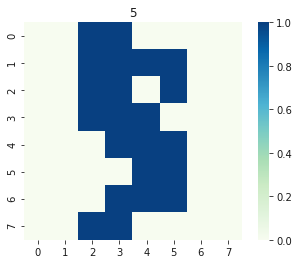

In [7]:
draw_digit(binary_digits.iloc[0])
plt.title(labels.iloc[0])

In [8]:
up_missing = binary_digits.iloc[:len(binary_digits)//4].copy()
bottom_missing = binary_digits.iloc[len(binary_digits)//4:len(binary_digits)//2].copy()
even_missing = binary_digits.iloc[len(binary_digits)//2:].copy()
up_missing.iloc[:, :D//2] = None
bottom_missing.iloc[:, D//2:] = None
even_missing.iloc[:, np.arange(0, D, 2)] = None

up_missing['dataset_id'] = 'up_missing'
bottom_missing['dataset_id'] = 'bottom_missing'
even_missing['dataset_id'] = 'even_missing'

training_data = pd.concat((up_missing, bottom_missing, even_missing))

In [9]:
training_data['weight'] = 1

In [10]:
def label_distribution(data, labels):
    ans = data[['dataset_id', 'weight']].join(labels).groupby(['dataset_id', 'label']).sum()['weight']
    ans /= ans.sum(level='dataset_id')
    
    return ans

# Part 1: All data in one dataset

Lump the three datasets into one, call it 'merged' dataset

In [11]:
training_data_same_dataset = training_data.copy()
training_data_same_dataset['dataset_id'] = 'merged'

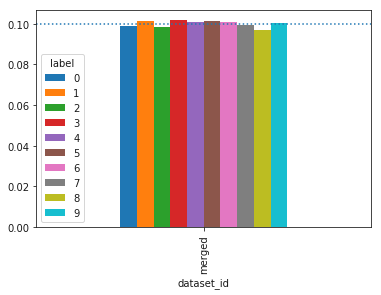

In [12]:
label_distribution(training_data_same_dataset, labels).unstack('label').plot(kind='bar')
plt.axhline(0.1, linestyle=':')

In [13]:
from bernoullimix.random_initialisation import random_mixture_generator

In [14]:
import logging
logging.basicConfig()
logging.getLogger().setLevel(logging.DEBUG)

In [15]:
%%time
from bernoullimix.n_components_search import search_k

results, mixtures  = search_k(K_RANGE_TO_SEARCH, 
                              training_data_same_dataset, 
                              mixtures_per_k=N_MIXTURES_TO_SEARCH_FOR_EACH_K, 
                              random_state=RANDOM_STATE, 
                              prior_mixing_coefficients=2,
                              prior_emission_probabilities=2,
                              n_jobs=CPUS_TO_USE, eps=EPSILON, n_iter=None)

DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: started. Log Likelihood: -38925.64171685354. Posterior: -39156.81027541232
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: started. Log Likelihood: -41138.607487055255. Posterior: -41504.20926199507
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: started. Log Likelihood: -37979.49656002092. Posterior: -38455.022761021624
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: started. Log Likelihood: -37842.91837799757. Posterior: -38671.89190251499
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: started. Log Likelihood: -38272.74748167411. Posterior: -38873.23156922864
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: started. Log Likelihood: -38366.8337651353. Posterior: -39088.62605728886
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: started. Log Likelihood: -37688.202569425805. Posterior: -38744.33497789505
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: started. Log Like

DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 300. Took: 1.10 seconds Log Likelihood: -18289.52961304447. Posterior: -19851.786121657555. Last Diff: 2.645596396178007e-05
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: started. Log Likelihood: -39721.33587431094. Posterior: -40300.97934940119
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 100. Took: -1534718251.58 seconds Log Likelihood: -20610.552558831136. Posterior: -21177.97875822125. Last Diff: 0.9640188599114481
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 300. Took: 1.18 seconds Log Likelihood: -18134.427609292645. Posterior: -19875.16503206695. Last Diff: 0.0004935928445775062
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 500. Took: 0.64 seconds Log Likelihood: -19843.53278294643. Posterior: -20621.017644094198. Last Diff: 9.779924585018307e-05
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:B

DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 200. Took: 0.76 seconds Log Likelihood: -19418.64900530019. Posterior: -20397.525306898544. Last Diff: 0.027678365855535958
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 400. Took: 0.87 seconds Log Likelihood: -19086.30484381067. Posterior: -20268.111712044847. Last Diff: 5.691745536751114e-05
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 100. Took: -1534718252.48 seconds Log Likelihood: -20522.073143931768. Posterior: -21095.665721112833. Last Diff: 0.005670869544701418
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 300. Took: 1.14 seconds Log Likelihood: -18568.35689187242. Posterior: -20116.901673466196. Last Diff: 1.783205645158887
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: finished. Iteration: 325. Converged: yes. Took: 3.509664s. Log Likelihood: -18751.241701996572. Posterior: -20112.269908070375. La

DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: finished. Iteration: 856. Converged: yes. Took: 10.594862s. Log Likelihood: -18145.574198856288. Posterior: -19871.328292884653. Last Diff: 9.610848792362958e-07 
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: started. Log Likelihood: -39497.40041024693. Posterior: -40572.905857081816
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 200. Took: 0.67 seconds Log Likelihood: -19839.65668412004. Posterior: -20616.48895509178. Last Diff: 8.39216954773292e-06
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 1300. Took: 0.49 seconds Log Likelihood: -21449.63442216329. Posterior: -21819.725886891734. Last Diff: 4.298344720155001e-06
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 400. Took: 1.01 seconds Log Likelihood: -18751.26760406969. Posterior: -20112.27811088803. Last Diff: 0.0010818845439644065
DEBUG:bernoullimix.mixture.MultiDatasetMixt

DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: finished. Iteration: 256. Converged: yes. Took: 3.0158959999999997s. Log Likelihood: -18285.277384756824. Posterior: -19843.19390930627. Last Diff: 9.207324183080345e-07 
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 1900. Took: 0.47 seconds Log Likelihood: -21449.708490686236. Posterior: -21819.718595340368. Last Diff: 4.691410140367225e-05
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 400. Took: 1.37 seconds Log Likelihood: -18087.752787057827. Posterior: -19993.77091159584. Last Diff: 4.639277176465839e-05
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: started. Log Likelihood: -39744.20658742307. Posterior: -40548.03075052657
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: started. Log Likelihood: -37158.320020880434. Posterior: -38085.07651270856
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: finished. Iteration: 321. Converged: yes. To

DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: started. Log Likelihood: -42169.84146355564. Posterior: -42399.24694402974
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: finished. Iteration: 222. Converged: yes. Took: 1.6331440000000015s. Log Likelihood: -20161.015858500006. Posterior: -20918.44048732194. Last Diff: 9.625073289498687e-07 
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: started. Log Likelihood: -40328.8245894525. Posterior: -41267.53778909941
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: started. Log Likelihood: -38004.63008580915. Posterior: -39060.14311308264
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 200. Took: 1.34 seconds Log Likelihood: -18145.925429898278. Posterior: -19999.93376349589. Last Diff: 0.1253329213395773
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: finished. Iteration: 424. Converged: yes. Took: 3.845437999999998s. Log Likelihood: -19125.492433123247. Posterior: -2028

DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 300. Took: 1.33 seconds Log Likelihood: -17841.51703214189. Posterior: -20126.225959217423. Last Diff: 2.7435424271970987e-05
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: finished. Iteration: 500. Converged: yes. Took: 6.776391999999998s. Log Likelihood: -17775.21968926493. Posterior: -19876.49411821063. Last Diff: 9.330760804004967e-07 
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: started. Log Likelihood: -37742.943730799. Posterior: -39032.27262861502
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 600. Took: 1.01 seconds Log Likelihood: -18591.94489767836. Posterior: -20131.130226522233. Last Diff: 1.2533273547887802e-06
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: finished. Iteration: 604. Converged: yes. Took: 6.4646609999999995s. Log Likelihood: -18591.94502581037. Posterior: -20131.13022218106. Last Diff: 9.921168384607881e-07 
DEBUG:berno

DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: finished. Iteration: 625. Converged: yes. Took: 6.988847s. Log Likelihood: -17650.970402104012. Posterior: -19929.107852506164. Last Diff: 9.783398127183318e-07 
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 300. Took: 1.13 seconds Log Likelihood: -17652.1103890133. Posterior: -20095.90680674764. Last Diff: 0.0004764160039485432
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: started. Log Likelihood: -36477.583475231935. Posterior: -37882.8546287575
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 800. Took: 1.02 seconds Log Likelihood: -17990.915785304787. Posterior: -20088.121357080483. Last Diff: 1.4957695384509861e-06
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 200. Took: 0.94 seconds Log Likelihood: -18023.896258452223. Posterior: -19927.94131245242. Last Diff: 0.13234838420612505
DEBUG:bernoullimix.mixture.MultiDatasetMixtur

DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: started. Log Likelihood: -38127.42911725803. Posterior: -39417.57261909617
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 200. Took: 1.14 seconds Log Likelihood: -17781.780799957087. Posterior: -20140.836349226556. Last Diff: 0.31606278208710137
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 200. Took: 1.05 seconds Log Likelihood: -17715.48135227027. Posterior: -20002.66367455647. Last Diff: 0.25794632636825554
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 100. Took: -1534718255.29 seconds Log Likelihood: -18258.767832052312. Posterior: -20259.778684739602. Last Diff: 5.497718398113648
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 300. Took: 1.04 seconds Log Likelihood: -17659.01076445674. Posterior: -20032.509960893436. Last Diff: 1.067148533769796
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: runn

DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 600. Took: 0.99 seconds Log Likelihood: -17879.15071686608. Posterior: -19962.405224399517. Last Diff: 6.40308644506149e-06
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 1100. Took: 1.07 seconds Log Likelihood: -17792.158967325595. Posterior: -20172.099806900438. Last Diff: 1.662734939600341e-05
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: finished. Iteration: 684. Converged: yes. Took: 7.274033999999993s. Log Likelihood: -17879.161205964054. Posterior: -19962.404984031164. Last Diff: 9.890718501992524e-07 
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 1200. Took: 1.05 seconds Log Likelihood: -17792.096527014022. Posterior: -20172.098601067122. Last Diff: 9.109218808589503e-06
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 1300. Took: 1.05 seconds Log Likelihood: -17792.042803367483. Posterior: -20172.097813

CPU times: user 2.78 s, sys: 274 ms, total: 3.05 s
Wall time: 1min 17s


/Users/saulius/.virtualenvs/py3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


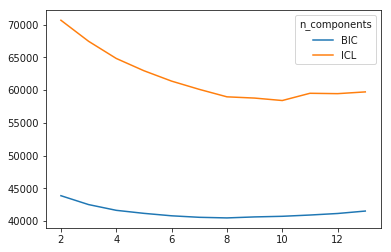

In [16]:
results.plot(y=['BIC', 'ICL'])

In [18]:
best = results[['BIC', 'ICL']].astype(float).idxmin()
best

n_components
BIC     8
ICL    10
dtype: int64

/Users/saulius/.virtualenvs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5,0.98,'Mixture K=8 (best BIC)')

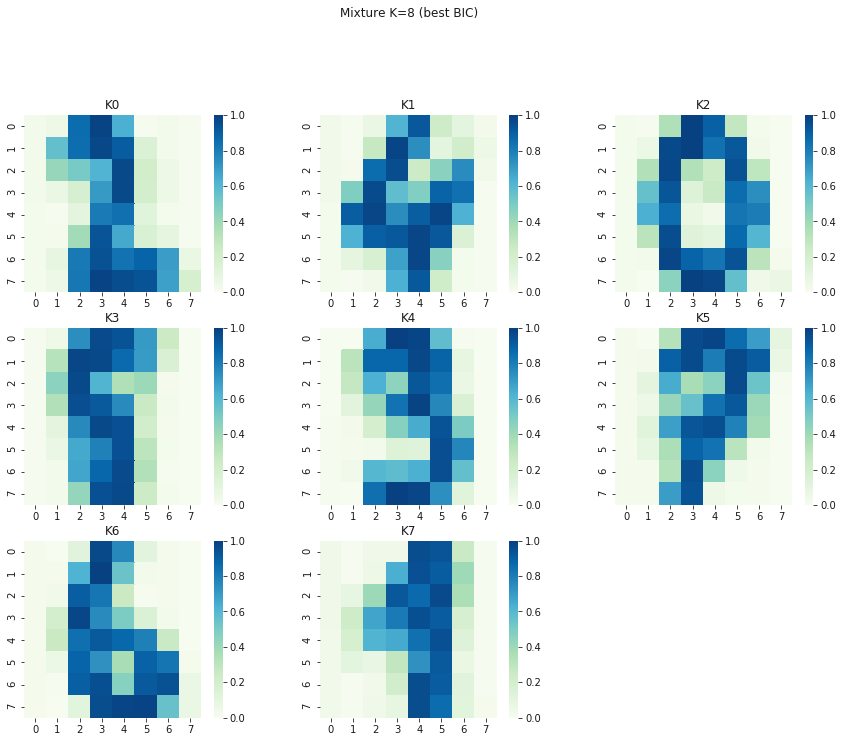

In [19]:
_method = 'BIC'
best_mixture = mixtures[best.loc[_method]]
plt.figure(figsize=(15,15))
for j, (component, row) in enumerate(best_mixture.emission_probabilities.iterrows(), start=1):
    plt.subplot(4,3,j)
    draw_digit(row)
    plt.title(component)
plt.suptitle('Mixture K={} (best {})'.format(best_mixture.n_components, _method))

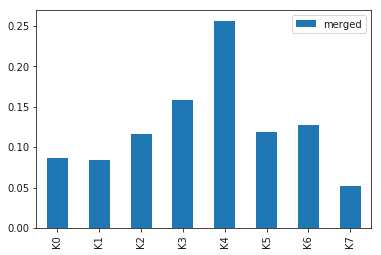

In [20]:
best_mixture.mixing_coefficients.T.plot(kind='bar')

/Users/saulius/.virtualenvs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5,0.98,'Mixture K=10 (best ICL)')

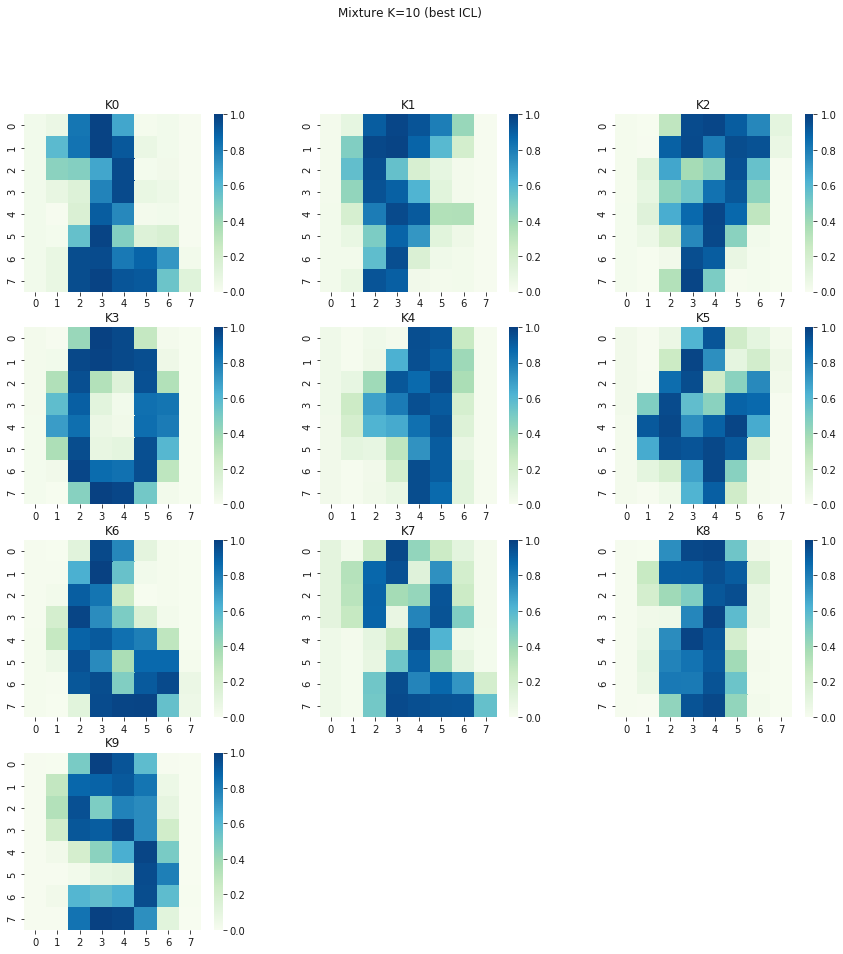

In [21]:
_method = 'ICL'
best_mixture = mixtures[best.loc[_method]]
plt.figure(figsize=(15,15))
for j, (component, row) in enumerate(best_mixture.emission_probabilities.iterrows(), start=1):
    plt.subplot(4,3,j)
    draw_digit(row)
    plt.title(component)
plt.suptitle('Mixture K={} (best {})'.format(best_mixture.n_components, _method))

# Part 2: spliting data into individual datasets

Allowing each of them to have their own mixing coefficient

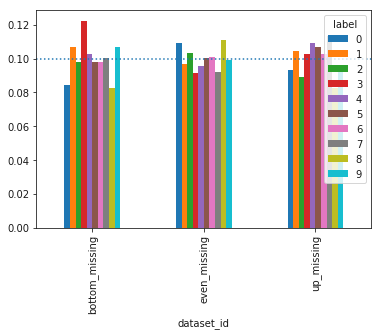

In [22]:
label_distribution(training_data, labels).unstack('label').plot(kind='bar')
plt.axhline(0.1, linestyle=':')

In [23]:
%%time
from bernoullimix.n_components_search import search_k

results_uc, mixtures_uc = search_k(K_RANGE_TO_SEARCH, 
                                   training_data, 
                                   mixtures_per_k=N_MIXTURES_TO_SEARCH_FOR_EACH_K, 
                                   random_state=RANDOM_STATE, 
                                   prior_mixing_coefficients=2,
                                   prior_emission_probabilities=2,
                                   n_jobs=CPUS_TO_USE, eps=EPSILON, n_iter=None)

DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: started. Log Likelihood: -38925.64171685354. Posterior: -39159.58286413456
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: started. Log Likelihood: -41138.607487055255. Posterior: -41510.80093572708
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: started. Log Likelihood: -38272.74748167411. Posterior: -38889.325948352984
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: started. Log Likelihood: -37979.49656002092. Posterior: -38466.11311591058
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: started. Log Likelihood: -37842.91837799757. Posterior: -38699.13464460176
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: started. Log Likelihood: -38366.8337651353. Posterior: -39110.12717091959
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: started. Log Likelihood: -37688.202569425805. Posterior: -38783.8850202871
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: started. Log Likel

DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 800. Took: 0.49 seconds Log Likelihood: -21440.497336109664. Posterior: -21814.573177840575. Last Diff: 0.0009326780236733612
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 500. Took: 0.80 seconds Log Likelihood: -20133.85444134768. Posterior: -21034.0683164752. Last Diff: 0.0015881451472523622
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 700. Took: 0.60 seconds Log Likelihood: -21162.409319727856. Posterior: -21690.261350207355. Last Diff: 8.779362006938754
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 600. Took: 0.72 seconds Log Likelihood: -19891.16167768719. Posterior: -20666.336457528458. Last Diff: 0.06044256778477575
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 400. Took: 1.23 seconds Log Likelihood: -19192.220160488756. Posterior: -20628.15381118714. Last Diff: 0.0006942873660591

DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 800. Took: 1.17 seconds Log Likelihood: -19357.62969252392. Posterior: -20619.688876108034. Last Diff: 0.0077752612487529404
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 1300. Took: 0.66 seconds Log Likelihood: -20861.29194900381. Posterior: -21421.63438935108. Last Diff: 0.0048379778090748005
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 100. Took: -1534718400.32 seconds Log Likelihood: -21728.801643980943. Posterior: -22086.51673449418. Last Diff: 0.0326530997917871
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 700. Took: 1.42 seconds Log Likelihood: -19391.252214531036. Posterior: -20925.421278231694. Last Diff: 0.00010675443263608031
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 1000. Took: 0.93 seconds Log Likelihood: -20132.751459229938. Posterior: -21033.668590481248. Last Diff: 1

DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 1100. Took: 1.16 seconds Log Likelihood: -19192.161544471994. Posterior: -20628.117999118294. Last Diff: 1.8848259060177952e-06
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 1000. Took: 1.31 seconds Log Likelihood: -19391.096942699784. Posterior: -20925.37079469179. Last Diff: 0.0006235843247850426
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 800. Took: 0.49 seconds Log Likelihood: -21442.63013293708. Posterior: -21816.930317225706. Last Diff: 0.07463877772897831
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 100. Took: -1534718401.47 seconds Log Likelihood: -19973.386162587412. Posterior: -20894.002943664975. Last Diff: 0.08693331806716742
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 1300. Took: 0.86 seconds Log Likelihood: -19497.11623006557. Posterior: -20621.0601907324. Last Diff: 0.

DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 100. Took: -1534718403.34 seconds Log Likelihood: -21928.207233267975. Posterior: -22288.643139525404. Last Diff: 1.3331684953227523
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 1400. Took: 0.77 seconds Log Likelihood: -20731.754547025404. Posterior: -21437.88127771558. Last Diff: 6.803740689065307e-06
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 1700. Took: 1.01 seconds Log Likelihood: -19333.09067118578. Posterior: -20480.960186037206. Last Diff: 0.41192662549292436
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 200. Took: 0.53 seconds Log Likelihood: -21452.990863212308. Posterior: -21829.710010042658. Last Diff: 1.4473867775159306
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 1000. Took: 0.64 seconds Log Likelihood: -20864.420870494134. Posterior: -21416.951793656328. Last Diff: 0.00

DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 1800. Took: 1.18 seconds Log Likelihood: -19192.155382269226. Posterior: -20628.114894854993. Last Diff: 1.8677936168387532e-05
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: started. Log Likelihood: -38740.394141895. Posterior: -39348.303450758045
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 1900. Took: 0.75 seconds Log Likelihood: -20731.54971081006. Posterior: -21437.87632222014. Last Diff: 2.8592286980710924e-05
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 100. Took: -1534718404.52 seconds Log Likelihood: -20596.950158646476. Posterior: -21170.60498242291. Last Diff: 0.8444513928297965
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: started. Log Likelihood: -37289.90587137129. Posterior: -38531.436144303494
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 100. Took: -1534718401.41 seconds Log Like

DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 100. Took: -1534718406.16 seconds Log Likelihood: -21905.444198566343. Posterior: -22400.355958058382. Last Diff: 0.08872213458380429
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 700. Took: 0.93 seconds Log Likelihood: -19675.1433428632. Posterior: -20758.940046406828. Last Diff: 2.4850538466125727e-05
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 500. Took: 1.12 seconds Log Likelihood: -19562.63461298042. Posterior: -20806.510073720277. Last Diff: 0.007372271120402729
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 300. Took: 1.32 seconds Log Likelihood: -19407.66144914944. Posterior: -20944.283675256553. Last Diff: 2.8547912536014337
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 2500. Took: 0.75 seconds Log Likelihood: -19996.722757069198. Posterior: -20754.02123931179. Last Diff: 1.3505

DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 100. Took: -1534718407.42 seconds Log Likelihood: -20248.549963574995. Posterior: -21271.848457152344. Last Diff: 0.8198925797405536
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 400. Took: 0.84 seconds Log Likelihood: -19821.15582493404. Posterior: -20741.15315515395. Last Diff: 0.0031398313149111345
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 200. Took: 0.75 seconds Log Likelihood: -20405.042389116727. Posterior: -21140.7474617012. Last Diff: 0.01830923045417876
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 300. Took: 1.23 seconds Log Likelihood: -19015.50161554047. Posterior: -20481.63786779344. Last Diff: 0.0008558150839235168
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 800. Took: 0.65 seconds Log Likelihood: -20682.592919176015. Posterior: -21242.992937476447. Last Diff: 0.000590

DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 900. Took: 0.80 seconds Log Likelihood: -19821.117009152833. Posterior: -20740.84184522266. Last Diff: 5.8020723372465e-05
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 800. Took: 0.70 seconds Log Likelihood: -20404.90928657187. Posterior: -21139.14158192001. Last Diff: 7.957576235639863e-05
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 1500. Took: 0.60 seconds Log Likelihood: -20682.592772833243. Posterior: -21242.90535463147. Last Diff: 6.44380270387046e-06
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 600. Took: 0.89 seconds Log Likelihood: -19742.68468825621. Posterior: -20833.367790428987. Last Diff: 0.00013367591236601584
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 200. Took: 1.27 seconds Log Likelihood: -19071.954024408056. Posterior: -20681.69157404404. Last Diff: 4.824467372807

DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: finished. Iteration: 1066. Converged: yes. Took: 10.077721000000004s. Log Likelihood: -19742.683166407645. Posterior: -20833.355770000733. Last Diff: 9.966461220756173e-07 
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: started. Log Likelihood: -36991.71208484167. Posterior: -37726.66862925831
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 100. Took: -1534718408.12 seconds Log Likelihood: -18761.099915201037. Posterior: -20530.639043380037. Last Diff: 0.5885106900022947
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 500. Took: 1.23 seconds Log Likelihood: -18660.777467110405. Posterior: -20170.00148171554. Last Diff: 0.10990832841707743
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 1500. Took: 0.87 seconds Log Likelihood: -19821.06663115679. Posterior: -20740.810608616037. Last Diff: 0.00011666755744954571
DEBUG:bernoullimix.mixtu

DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 400. Took: 1.48 seconds Log Likelihood: -18755.95030090194. Posterior: -20670.504006785137. Last Diff: 0.0004154162743361667
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 400. Took: 0.73 seconds Log Likelihood: -20244.92364488457. Posterior: -20985.301168983675. Last Diff: 0.0015668769119656645
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 500. Took: 0.91 seconds Log Likelihood: -19412.336894521217. Posterior: -20539.147192174063. Last Diff: 0.0003365315278642811
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 100. Took: -1534718407.14 seconds Log Likelihood: -19553.676440328654. Posterior: -21058.19668859368. Last Diff: 1.7296278935791634
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 2100. Took: 0.76 seconds Log Likelihood: -19636.431047982238. Posterior: -20582.04717766062. Last Diff: 0.0

DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 600. Took: 1.25 seconds Log Likelihood: -19332.536817225948. Posterior: -20603.419823962373. Last Diff: 4.543268369161524e-05
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: finished. Iteration: 742. Converged: yes. Took: 11.657295000000005s. Log Likelihood: -18755.407081684014. Posterior: -20670.48004896249. Last Diff: 9.982759365811944e-07 
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: started. Log Likelihood: -37742.943730799. Posterior: -39085.026324616585
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 100. Took: -1534718413.09 seconds Log Likelihood: -20061.754371118586. Posterior: -20952.12886648273. Last Diff: 0.14512562480013003
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 100. Took: -1534718412.84 seconds Log Likelihood: -20021.792904662383. Posterior: -21070.385614266408. Last Diff: 2.0130562202648434
DEBUG:bernoullimix

DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 500. Took: 0.77 seconds Log Likelihood: -19944.762547158567. Posterior: -20707.069634375213. Last Diff: 0.00020676906206062995
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 700. Took: 0.94 seconds Log Likelihood: -19622.56738065111. Posterior: -20581.735282244576. Last Diff: 0.002357780271267984
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 900. Took: 1.51 seconds Log Likelihood: -19055.998252353376. Posterior: -20622.265458341473. Last Diff: 1.0608742741169408e-05
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 100. Took: -1534718406.68 seconds Log Likelihood: -18668.2210912444. Posterior: -20767.03137359077. Last Diff: 0.4608239074841549
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 500. Took: 1.61 seconds Log Likelihood: -19412.08238981179. Posterior: -21071.799850164087. Last Diff: 0.00

DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: finished. Iteration: 1271. Converged: yes. Took: 10.609932s. Log Likelihood: -19836.64313581279. Posterior: -20621.488577676366. Last Diff: 9.705145203042775e-07 
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 900. Took: 1.56 seconds Log Likelihood: -19412.08200798114. Posterior: -21071.7725214652. Last Diff: 2.4797664082143456e-06
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 500. Took: 1.66 seconds Log Likelihood: -18516.0599024986. Posterior: -20634.205991370854. Last Diff: 0.0065162102691829205
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 800. Took: 1.53 seconds Log Likelihood: -18971.473458517423. Posterior: -20855.255616961364. Last Diff: 0.0005224653395998757
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 2400. Took: 1.21 seconds Log Likelihood: -18431.45884565165. Posterior: -19997.888489820987. Last 

DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 1000. Took: 1.38 seconds Log Likelihood: -18427.648803345735. Posterior: -20574.544686411307. Last Diff: 5.609737854683772e-06
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 100. Took: -1534718410.69 seconds Log Likelihood: -19218.829630327396. Posterior: -20628.78654926254. Last Diff: 4.652407071909693
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 300. Took: 1.29 seconds Log Likelihood: -19024.523434396106. Posterior: -20876.888829523206. Last Diff: 0.09535682968999026
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: finished. Iteration: 1051. Converged: yes. Took: 17.036885999999996s. Log Likelihood: -18427.638466711745. Posterior: -20574.544564549364. Last Diff: 9.788927854970098e-07 
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: started. Log Likelihood: -37654.277130958886. Posterior: -39133.29553616179
DEBUG:bernoullimix.mixtu

DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 1100. Took: 1.10 seconds Log Likelihood: -19020.79668095748. Posterior: -20579.7547236362. Last Diff: 7.349352017627098e-05
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 500. Took: 1.39 seconds Log Likelihood: -18795.38292052065. Posterior: -20847.3588497163. Last Diff: 7.84059739089571e-05
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 1200. Took: 1.20 seconds Log Likelihood: -18688.36259141341. Posterior: -20457.484338098. Last Diff: 0.0029340490691538434
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 900. Took: 1.31 seconds Log Likelihood: -18950.073116337444. Posterior: -20833.929953900766. Last Diff: 0.5030063526064623
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 300. Took: 1.05 seconds Log Likelihood: -19560.222275589877. Posterior: -20935.82336610516. Last Diff: 0.009365795813209843

DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 200. Took: 0.93 seconds Log Likelihood: -19164.119923517443. Posterior: -20850.619836679038. Last Diff: 0.35259909225351294
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 1600. Took: 0.98 seconds Log Likelihood: -18692.063256859088. Posterior: -20628.342590424323. Last Diff: 0.004399611931148684
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 400. Took: 1.07 seconds Log Likelihood: -18635.32157922189. Posterior: -20677.38193899223. Last Diff: 0.004047425118187675
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 700. Took: 1.10 seconds Log Likelihood: -18634.024236160152. Posterior: -20834.30173782522. Last Diff: 9.485724149271846e-06
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 300. Took: 0.91 seconds Log Likelihood: -19143.968850402645. Posterior: -20841.955675508998. Last Diff: 0.00622174919

DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: started. Log Likelihood: -37258.63739691062. Posterior: -38738.88397819764
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 1500. Took: 1.15 seconds Log Likelihood: -18515.750640201873. Posterior: -20742.201002300422. Last Diff: 0.00012853602311224677
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 1300. Took: 0.93 seconds Log Likelihood: -19127.24246042178. Posterior: -20837.424247151885. Last Diff: 0.0011210746451979503
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 800. Took: 0.99 seconds Log Likelihood: -19096.318980378197. Posterior: -20923.912495258995. Last Diff: 7.323276804527268e-06
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 100. Took: -1534718409.59 seconds Log Likelihood: -18721.895225305132. Posterior: -20785.776859924277. Last Diff: 0.12958331154004554
DEBUG:bernoullimix.mixture.MultiDatasetMixture

DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 600. Took: 1.12 seconds Log Likelihood: -18625.79242976797. Posterior: -20853.101035203057. Last Diff: 0.00010170154200750403
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 800. Took: 1.01 seconds Log Likelihood: -18802.929836313546. Posterior: -20714.819395027873. Last Diff: 0.32727432339743245
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 2400. Took: 0.93 seconds Log Likelihood: -18613.941425333454. Posterior: -20416.35453476801. Last Diff: 0.04868875875399681
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 1000. Took: 1.08 seconds Log Likelihood: -18585.08916696693. Posterior: -20675.412855363647. Last Diff: 7.5254101830068976e-06
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 900. Took: 0.99 seconds Log Likelihood: -18709.557355562458. Posterior: -20629.530265792208. Last Diff: 1.28102702

DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 1800. Took: 0.97 seconds Log Likelihood: -18537.712155850095. Posterior: -20479.679503947486. Last Diff: 5.907639570068568e-05
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 700. Took: 1.06 seconds Log Likelihood: -18520.870118751693. Posterior: -20618.79059044575. Last Diff: 7.255262971739285e-05
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 400. Took: 1.09 seconds Log Likelihood: -18675.205669607298. Posterior: -20879.358800803468. Last Diff: 0.000760550239647273
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: finished. Iteration: 3495. Converged: yes. Took: 32.406391s. Log Likelihood: -18522.923591744395. Posterior: -20342.960905398406. Last Diff: 9.986761142499745e-07 
DEBUG:bernoullimix.mixture.MultiDatasetMixtureModel:BMM: running. Iteration: 1900. Took: 0.94 seconds Log Likelihood: -18537.781546917948. Posterior: -20479.676798946122. 

CPU times: user 3.43 s, sys: 496 ms, total: 3.92 s
Wall time: 2min 29s


In [26]:
best_uc = results_uc[['BIC', 'ICL']].astype(float).idxmin()
best_uc

n_components
BIC    8
ICL    5
dtype: int64

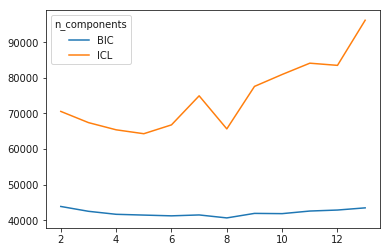

In [27]:
results_uc[['BIC', 'ICL']].plot()

/Users/saulius/.virtualenvs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


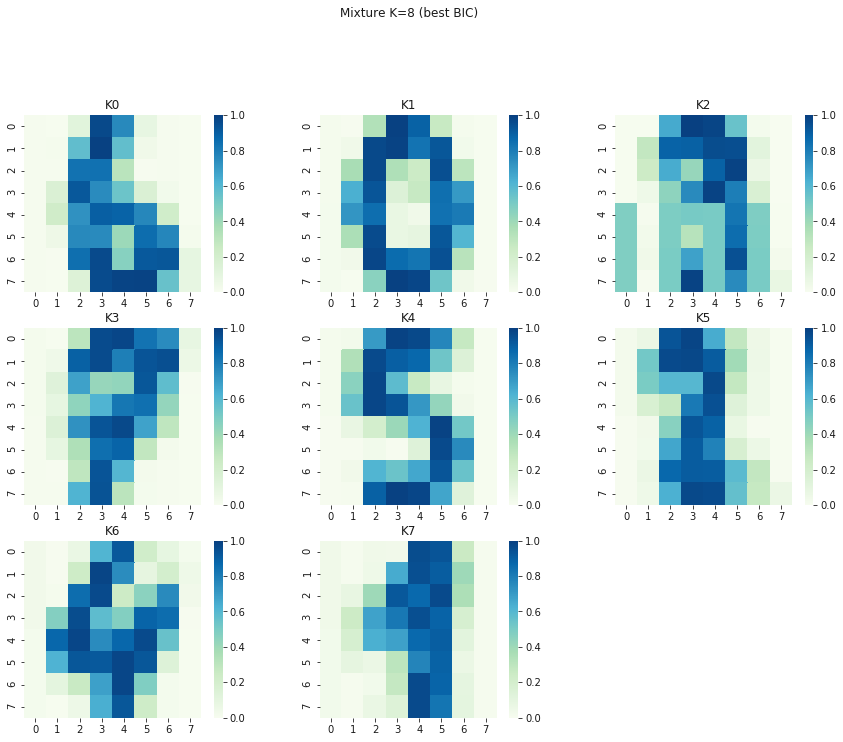

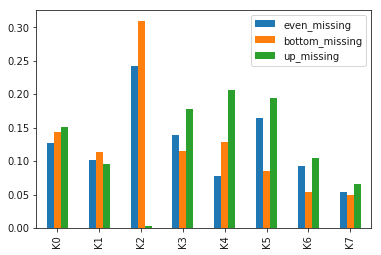

In [30]:
_method = 'BIC'
best_mixture_uc = mixtures_uc[best_uc.loc[_method]]
plt.figure(figsize=(15,15))
for j, (component, row) in enumerate(best_mixture_uc.emission_probabilities.iterrows(), start=1):
    plt.subplot(4,3,j)
    draw_digit(row)
    plt.title(component)
plt.suptitle('Mixture K={} (best {})'.format(best_mixture_uc.n_components, _method))

best_mixture_uc.mixing_coefficients.T.plot(kind='bar')

/Users/saulius/.virtualenvs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


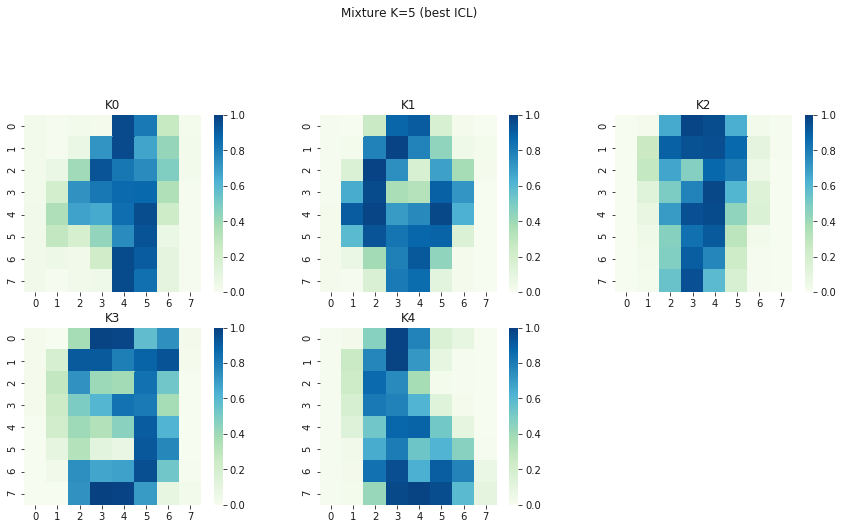

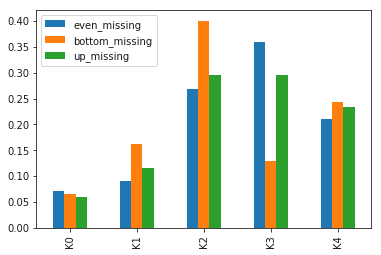

In [31]:
_method = 'ICL'
best_mixture_uc = mixtures_uc[best_uc.loc[_method]]
plt.figure(figsize=(15,15))
for j, (component, row) in enumerate(best_mixture_uc.emission_probabilities.iterrows(), start=1):
    plt.subplot(4,3,j)
    draw_digit(row)
    plt.title(component)
plt.suptitle('Mixture K={} (best {})'.format(best_mixture_uc.n_components, _method))

best_mixture_uc.mixing_coefficients.T.plot(kind='bar')